<h1 style="text-align: center;">Assignment 7: Energy Efficiency Dataset</h1>

<p style="text-align: center;">Predicting Heating Load from Building Features</p>

## Q1: Load Dataset

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Read Excel file
df = pd.read_excel('ENB2012_data.xlsx')

# Rename columns
columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
           'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution',
           'Heating_Load', 'Cooling_Load']
df.columns = columns

df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## Q2: Dataset Summary

In [17]:
print("Dataset Info:")
print(f"Rows: {len(df)}")
print(f"Columns: {len(df.columns)}")
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"\nBasic statistics:")
df.describe()

Dataset Info:
Rows: 768
Columns: 10

Missing values:
Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

Basic statistics:


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


## Q3: Feature Distributions

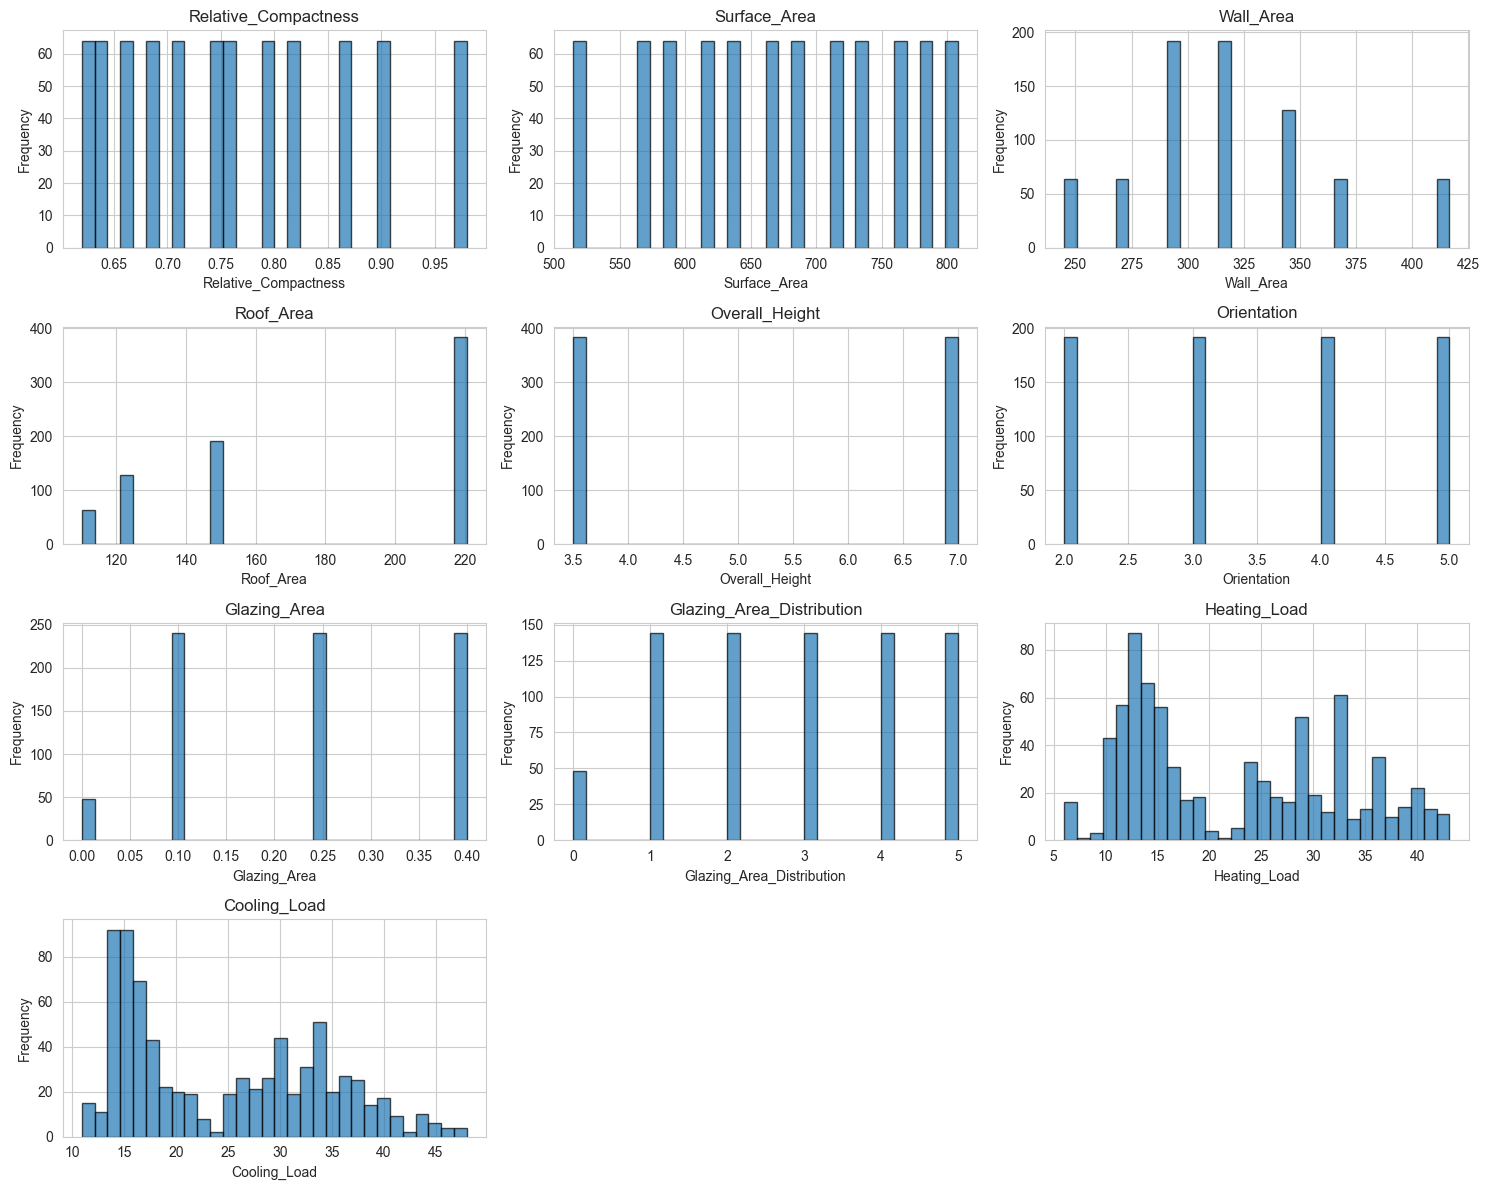

In [18]:
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(df.columns):
    axes[idx].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

for idx in range(len(df.columns), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

**Observations:**
- Orientation and Glazing_Area_Distribution are categorical
- Overall_Height has only 2 values
- Surface/Wall/Roof areas show multiple peaks

## Q4: Unique Values

In [19]:
print("Unique values per feature:")
for col in df.columns:
    print(f"{col:30s}: {df[col].nunique():3d}")

print("\nCategorical features:")
for col in ['Orientation', 'Glazing_Area_Distribution', 'Overall_Height']:
    print(f"\n{col}:")
    print(df[col].value_counts().sort_index())

Unique values per feature:
Relative_Compactness          :  12
Surface_Area                  :  12
Wall_Area                     :   7
Roof_Area                     :   4
Overall_Height                :   2
Orientation                   :   4
Glazing_Area                  :   4
Glazing_Area_Distribution     :   6
Heating_Load                  : 587
Cooling_Load                  : 636

Categorical features:

Orientation:
Orientation
2    192
3    192
4    192
5    192
Name: count, dtype: int64

Glazing_Area_Distribution:
Glazing_Area_Distribution
0     48
1    144
2    144
3    144
4    144
5    144
Name: count, dtype: int64

Overall_Height:
Overall_Height
3.5    384
7.0    384
Name: count, dtype: int64


## Q4.1: Duplicates

In [20]:
n_duplicates = df.duplicated().sum()
print(f"Duplicate rows: {n_duplicates}")

Duplicate rows: 0


## Q5: Correlation with Target

Correlations with Heating_Load:
Cooling_Load                 0.975862
Overall_Height               0.889430
Relative_Compactness         0.622272
Wall_Area                    0.455671
Glazing_Area                 0.269842
Glazing_Area_Distribution    0.087368
Orientation                 -0.002587
Surface_Area                -0.658120
Roof_Area                   -0.861828
Name: Heating_Load, dtype: float64


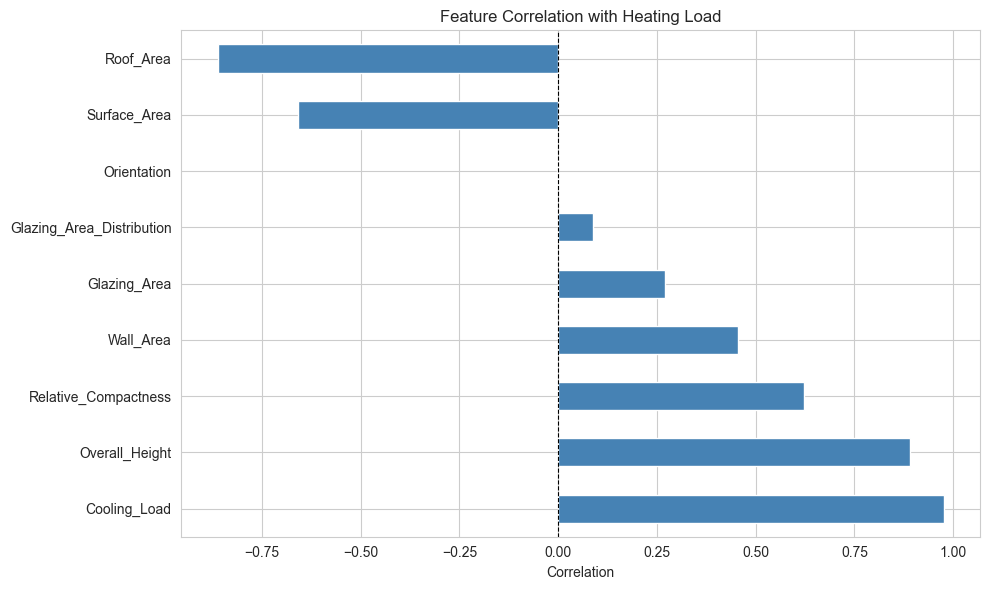


⚠️ WARNING: Cooling_Load has high correlation (0.976)
This is DATA LEAKAGE - must remove it!


In [21]:
correlations = df.corr()['Heating_Load'].drop('Heating_Load').sort_values(ascending=False)

print("Correlations with Heating_Load:")
print(correlations)

plt.figure(figsize=(10, 6))
correlations.plot(kind='barh', color='steelblue')
plt.title('Feature Correlation with Heating Load')
plt.xlabel('Correlation')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

print("\n⚠️ WARNING: Cooling_Load has high correlation (0.976)")
print("This is DATA LEAKAGE - must remove it!")

## Q6: Scatter Matrix

Weak correlation features: ['Wall_Area', 'Glazing_Area', 'Glazing_Area_Distribution', 'Orientation']


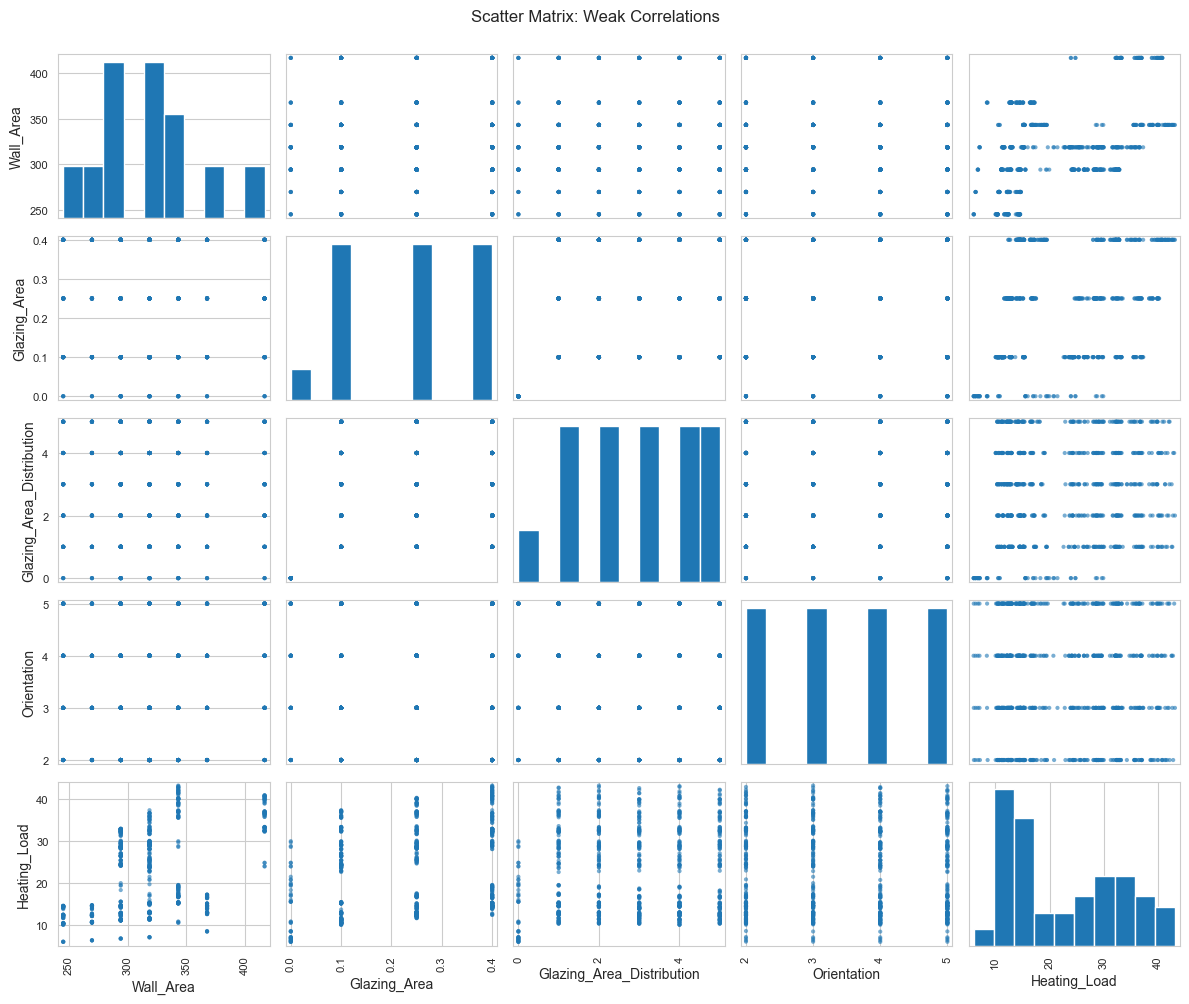

In [22]:
from pandas.plotting import scatter_matrix

# Select weak correlations
weak_features = correlations[abs(correlations) < 0.5].index.tolist()
features_to_plot = weak_features + ['Heating_Load']

print(f"Weak correlation features: {weak_features}")

scatter_matrix(df[features_to_plot], figsize=(12, 10), alpha=0.6, diagonal='hist')
plt.suptitle('Scatter Matrix: Weak Correlations', y=1.0)
plt.tight_layout()
plt.show()

## Q7: Custom Transformer

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin

class RatioTransformer(BaseEstimator, TransformerMixin):
    """Creates ratio features from column pairs"""
    
    def __init__(self, ratio_pairs):
        # ratio_pairs = [(num_col, denom_col, new_col_name), ...]
        self.ratio_pairs = ratio_pairs
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        for num_col, denom_col, new_col in self.ratio_pairs:
            # +1e-10 prevents division by zero
            X_copy[new_col] = X_copy[num_col] / (X_copy[denom_col] + 1e-10)
        return X_copy

# Test
ratio_transformer = RatioTransformer([('Wall_Area', 'Surface_Area', 'Wall_to_Surface_Ratio')])
test_df = ratio_transformer.fit_transform(df.head())
print("New feature created:")
print(test_df[['Wall_Area', 'Surface_Area', 'Wall_to_Surface_Ratio']].head())

New feature created:
   Wall_Area  Surface_Area  Wall_to_Surface_Ratio
0      294.0         514.5               0.571429
1      294.0         514.5               0.571429
2      294.0         514.5               0.571429
3      294.0         514.5               0.571429
4      318.5         563.5               0.565217


## Q8: Preprocessing Pipeline

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define feature groups
categorical_features = ['Orientation', 'Glazing_Area_Distribution']
numerical_features = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
                      'Overall_Height', 'Glazing_Area']

# Create pipeline
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features),  # drop='first' avoids multicollinearity
    ('num', StandardScaler(), numerical_features)  # Mean=0, Std=1
], remainder='drop')

print("Pipeline created!")
print(f"Categorical: {categorical_features}")
print(f"Numerical: {numerical_features}")

Pipeline created!
Categorical: ['Orientation', 'Glazing_Area_Distribution']
Numerical: ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Glazing_Area']


## Q9: Train/Test Split

In [25]:
from sklearn.model_selection import train_test_split

# Remove both targets (avoid data leakage!)
X = df.drop(['Heating_Load', 'Cooling_Load'], axis=1)
y = df['Heating_Load']

# Split: 80% train, 20% test, random_state=42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training: {len(X_train)} samples")
print(f"Test: {len(X_test)} samples")

Training: 614 samples
Test: 154 samples


## Q10: Apply Preprocessing

In [26]:
# Fit on train only (no data leakage!)
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Processed train shape: {X_train_processed.shape}")
print(f"Processed test shape: {X_test_processed.shape}")
print(f"Total features: {X_train_processed.shape[1]}")

Processed train shape: (614, 14)
Processed test shape: (154, 14)
Total features: 14


## Q11: Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train model
lr_model = LinearRegression()
lr_model.fit(X_train_processed, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test_processed)

# Evaluate
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print(f"RMSE: {rmse_lr:.4f}")
print(f"R² Score: {r2_lr:.4f}")

Linear Regression Results:
RMSE: 2.8723
R² Score: 0.9209


## Q12: Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

# n_estimators=200: number of trees
# random_state=42: reproducibility
# n_jobs=-1: use all CPU cores
rf_model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf_model.fit(X_train_processed, y_train)

y_pred_rf = rf_model.predict(X_test_processed)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results:")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")

Random Forest Results:
RMSE: 0.5285
R² Score: 0.9973


## Q13: Gradient Boosting

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

# n_estimators=200: number of boosting rounds
# learning_rate default=0.1: step size
gb_model = GradientBoostingRegressor(n_estimators=200, random_state=42)
gb_model.fit(X_train_processed, y_train)

y_pred_gb = gb_model.predict(X_test_processed)

rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Results:")
print(f"RMSE: {rmse_gb:.4f}")
print(f"R² Score: {r2_gb:.4f}")

Gradient Boosting Results:
RMSE: 0.4403
R² Score: 0.9981


## Q14: Model Comparison

Model Comparison:
            Model     RMSE  R² Score
Gradient Boosting 0.440269  0.998140
    Random Forest 0.528480  0.997321
Linear Regression 2.872277  0.920850


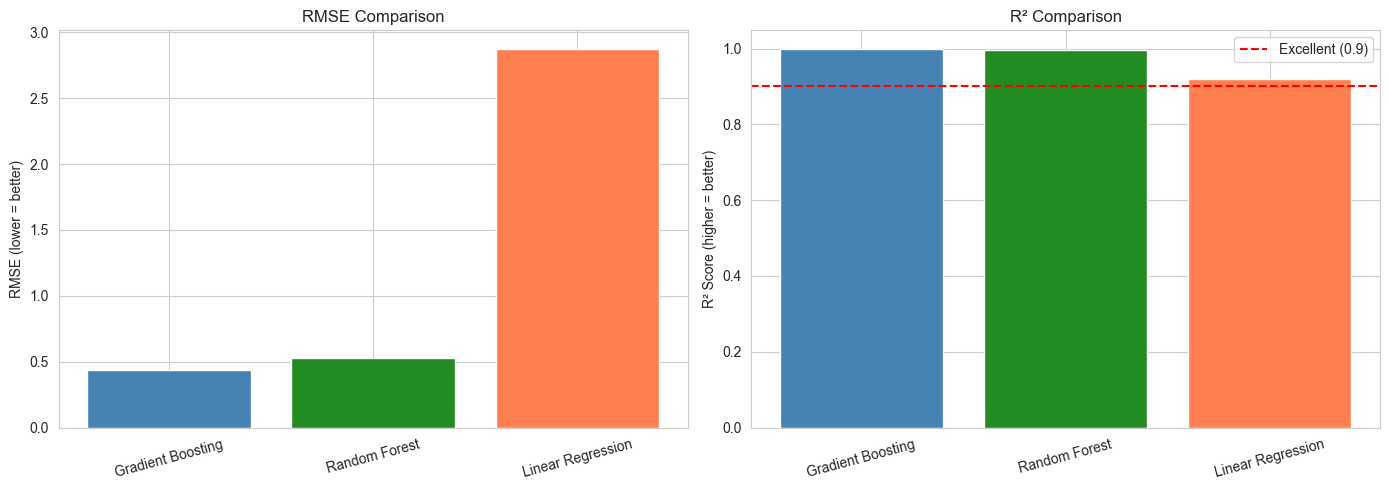

In [30]:
# Create comparison table
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'RMSE': [rmse_lr, rmse_rf, rmse_gb],
    'R² Score': [r2_lr, r2_rf, r2_gb]
})

results = results.sort_values('R² Score', ascending=False).reset_index(drop=True)
print("Model Comparison:")
print(results.to_string(index=False))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# RMSE (lower is better)
axes[0].bar(results['Model'], results['RMSE'], color=['steelblue', 'forestgreen', 'coral'])
axes[0].set_ylabel('RMSE (lower = better)')
axes[0].set_title('RMSE Comparison')
axes[0].tick_params(axis='x', rotation=15)

# R² (higher is better)
axes[1].bar(results['Model'], results['R² Score'], color=['steelblue', 'forestgreen', 'coral'])
axes[1].set_ylabel('R² Score (higher = better)')
axes[1].set_title('R² Comparison')
axes[1].tick_params(axis='x', rotation=15)
axes[1].axhline(y=0.9, color='red', linestyle='--', label='Excellent (0.9)')
axes[1].legend()

plt.tight_layout()
plt.show()

## R² Metric Explanation

**R² (Coefficient of Determination)** measures how well the model explains data variance.

**Range**: 0 to 1 (can be negative for very bad models)

**Interpretation**:
- **R² = 1.0**: Perfect predictions (100% variance explained)
- **R² = 0.9**: Excellent (90% variance explained)
- **R² = 0.5**: Moderate (50% variance explained)
- **R² = 0.0**: No better than predicting the average

**Why tree models win**:
- Building features have **non-linear** relationships
- Complex interactions between shape, area, and glazing
- Linear Regression assumes straight-line relationships
- Random Forest and Gradient Boosting capture curves and interactions